# k-means clustering

In this exercise we will apply the concepts learned during the lectures regarding unsupervised clustering methods.

The k-means algorithm is a simple clustering approach that can still be very effective under the right circumstances, i.e. when the assumptions of k-means are met.

First we will load the necessary packages and select a suitable colormap.

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# set nipy_spectral as default colormap for all plots from now on
matplotlib.rc('image', cmap='nipy_spectral')

#### Task 1

Load and inspect the provided 2-dimensional data set `synth.txt` and determine a suitable value for $k$ before we apply the actual algorithm in task 2. If you are not sure, pick multiple feasible values for $k$ that could be used.

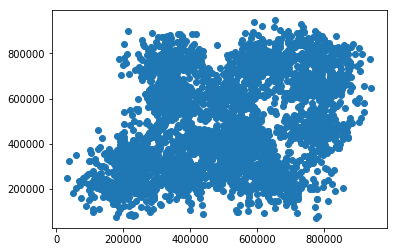

In [3]:
# Your code below here
# Load data
X = np.loadtxt('data/synth.txt')
N_samples = X.shape
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(X[:, 0], X[:, 1])

#### Task 2

a) Apply the `KMeans` algorithm as provided by sklearn to the data set using your chosen values for $k$. Additionally use the values 2 and 100 for $k$.

b) For each value of $k$, visualize your results. Use a scatter plot with each cluster having a distinct color. Additionally plot the cluster centroids. As you will be plotting multiple cluster results in the next few tasks, writing a `plot_clustering` function may be helpful. *Hint:* You can access the cluster labels from the fitted kmeans object using `kmeans.labels_` and the centroids using `kmeans.cluster_centers_`.


In [4]:
def plot_clustering(data, labels, centroids=None, title='', ax=None):
    # Your code below here
    ax.scatter(X[:, 0], X[:, 1], c=labels)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker="+")
    ax.set_title(title)
    
    #pass # remove this if return statement is implemented

cluster_centers: (3, 2)
cluster_centers: (4, 2)
cluster_centers: (5, 2)
cluster_centers: (6, 2)
cluster_centers: (7, 2)
cluster_centers: (8, 2)
cluster_centers: (9, 2)
cluster_centers: (2, 2)
cluster_centers: (100, 2)


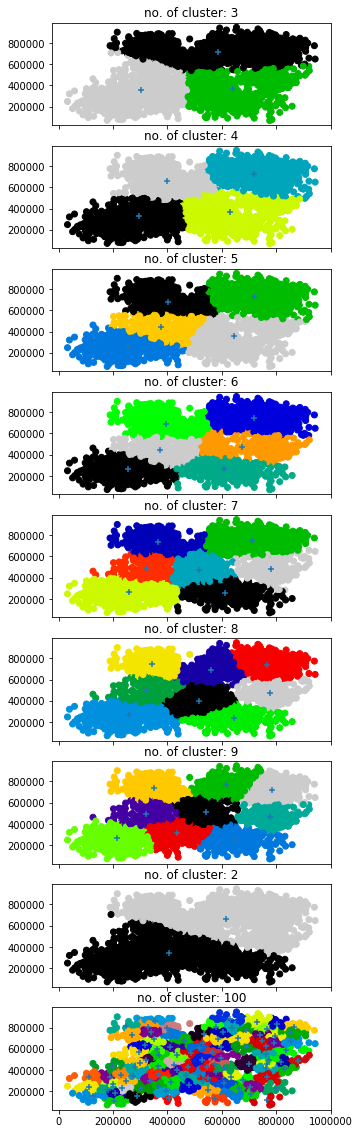

In [5]:
# Insert your values for k you would like to test k-means with into this array
good_Ks = [2, 100]
my_k = np.arange(3, 10, step=1)
# Your code below here
k_values = np.append(my_k, good_Ks)
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(5, 20), sharex=True)
for i, n_cluster in enumerate(k_values):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    print(f'cluster_centers: {cluster_centers.shape}')
    plot_clustering(X, labels, centroids=cluster_centers, 
                    title='no. of cluster: %i' %n_cluster, ax=axes[i])

# Assessing clustering quality

As the used data set was only using $D=2$ dimensions, we could easily plot the results and judge whether the assigned clusters make sense. For large values of $D$, a visual inspection would require either a dimensionality reduction as preprocessing (e.g. via PCA), or a post-processing (e.g. via tSNE, see https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) to project the clustered data to a lower-dimensional representation. However, there are metrics that quantify how *good* a clustering results is. One commonly used metric is the **silhouette score**. This metric quantifies the intuition, that data points within one cluster should be close to each other but far away from neighbouring clusters.

For each single data point $i$ in a cluster $C_n$ we can calculate how well this data point fits within its cluster, i.e. whether the average distance of this $i$-th data point in cluster $C_n$ to all other data points in $C_n$ is small.

$a(i) = \dfrac{1}{|C_n| - 1} \sum\limits_{j \in C_n, i\neq j} d(i,j), \;\; i,j \in C_n$

Any distance measure $d$ can be used, however, we use Euclidean distance. This metric $a(i)$ quantifies how well a data point fits within its assigned cluster. Now we want to quantify how dissimilar this data point $i$ is to the other clusters. Specifically we are interested in the dissimilarity to its closest neighbouring cluster.

$b(i) = \min\limits_{C_m \neq C_n} \dfrac{1}{|C_m|} \sum\limits_{j \in C_m} d(i,j)$

Using both of these metrics we can now formulate the silhouette score:

$s(i) = \dfrac{b(i) - a(i)}{\max\{a(i), b(i)\}}$

Note that $s(i) \in \left[-1,1\right]$ where $-1$ represents a bad cluster assignment and $1$ a good assignment.


#### Task 3

Use the `silhouette_score` implementation of sklearn to calculate the average silhouette score of all samples for a clustering result.

Calculate the average silhouette score of all data points for clusterings obtained by using the k-means algorithm for all values of $k \in [2,20]$. Finally, plot the average silhouette score depending on $k$. How would you interpret these results?

Text(0, 0.5, 'sill score')

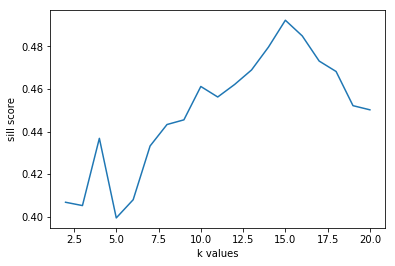

In [6]:
from sklearn.metrics import silhouette_score

Ks = range(2,21)
# Your code below here
scores = []
for n_clusters in Ks:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores.append(silhouette_avg)
    
fig, ax1 = plt.subplots(1, 1)
ax1.plot(Ks, scores)
ax1.set_xlabel("k values")
ax1.set_ylabel("sill score")




In [7]:
Ks = range(2,21)
Ks

range(2, 21)